# Linear Regression

## Overview

Linear regression as a form of supervised learning and is all about fitting a straight line to best fit a collection of numeric data points.

In [592]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as matcol
import seaborn as sb
            
# Configuration
%matplotlib inline
%config InlineBackend.figure_format='retina'
sb.set(style='ticks')

color_blue: #4c72b0
color_orange: #dd8452
color_green: #55a868
color_red: #c44e52
color_purple: #8172b3
color_brown: #937860
color_pink: #da8bc3
color_grey: #8c8c8c
color_yellow: #ccb974
color_aqua: #64b5cd


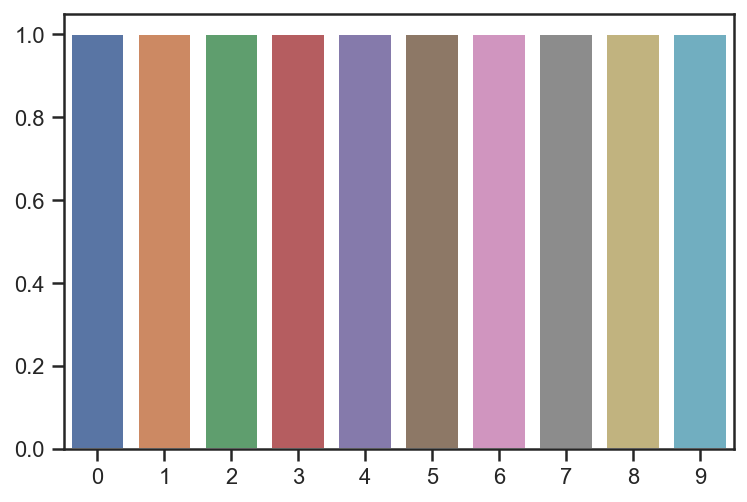

In [593]:
# Set color vars
color_blue = sb.color_palette(palette='deep')[0]
color_orange = sb.color_palette(palette='deep')[1]
color_green = sb.color_palette(palette='deep')[2]
color_red = sb.color_palette(palette='deep')[3]
color_purple = sb.color_palette(palette='deep')[4]
color_brown = sb.color_palette(palette='deep')[5]
color_pink = sb.color_palette(palette='deep')[6]
color_grey = sb.color_palette(palette='deep')[7]
color_yellow = sb.color_palette(palette='deep')[8]
color_aqua = sb.color_palette(palette='deep')[9]

print('color_blue: {}'.format(matcol.to_hex(color_blue)))
print('color_orange: {}'.format(matcol.to_hex(color_orange)))
print('color_green: {}'.format(matcol.to_hex(color_green)))
print('color_red: {}'.format(matcol.to_hex(color_red)))
print('color_purple: {}'.format(matcol.to_hex(color_purple)))
print('color_brown: {}'.format(matcol.to_hex(color_brown)))
print('color_pink: {}'.format(matcol.to_hex(color_pink)))
print('color_grey: {}'.format(matcol.to_hex(color_grey)))
print('color_yellow: {}'.format(matcol.to_hex(color_yellow)))
print('color_aqua: {}'.format(matcol.to_hex(color_aqua)))

sb.barplot(x=np.arange(0,10), y=[1] * 10, palette='deep');

## Fitting the Line

### Absolute Trick

One of the ways (or 'tricks') which is used in machine learning to move a line towards the points to fit is the "Absolute Trick". Here the slope and the intercept of a line are slowly adjusted, taking small steps towards a better fit of the line compared to the related points. For this method the x-coordinate of the point(s) to fit against is also factored in and will impact the ratio of change between slope and intercept. The higher the value for the x-coordinate of a point, the more this ratio will favor towards changing the slope over changing the intercept.

The formula below describes the plotted line, with a slope $\color{#64b5cd}{w_1}$ and an intecept $\color{#64b5cd}{w_2}$. In the below examples, the line needs to fit the point at $\color{#8172b3}{(p,q)}$, meaning it will need to move closer to it. To achieve this, steps would be taken towards a better fit as per the "learning rate" $\color{#dd8452}{\alpha}$, which would slowly adjust the slope towards the point as well as moving the full line upwards.

$y = \color{#64b5cd}{(w_1 + \color{#8172b3}{p}\color{#dd8452}{\alpha})}x + \color{#64b5cd}{(w_2 + \color{#dd8452}{\alpha})}$

In general, in machine learning, we want to make very steps when fitting a model to avoid overshooting in either direction, which is why we take a small $\color{#dd8452}{\alpha}$ value, for example $0.005$ in below example. As we increase $\color{#dd8452}{\alpha}$ stepwise, the line slowly moves closer to the point by changes slope as well as moving up.

#### Example 1: point above the line, with positive x-coordinate

The most straight forward example is one where we adjust a line to fit a single point which has a positive x-coordinate and where the point is located above the current line. Here, the formula specified, would make the slope $\color{#64b5cd}{w_1}$ as well as the intercept $\color{#64b5cd}{w_2}$ increase.

$y = \color{#64b5cd}{(w_1 + \color{#8172b3}{p}\color{#dd8452}{\alpha})}x + \color{#64b5cd}{(w_2 + \color{#dd8452}{\alpha})}$

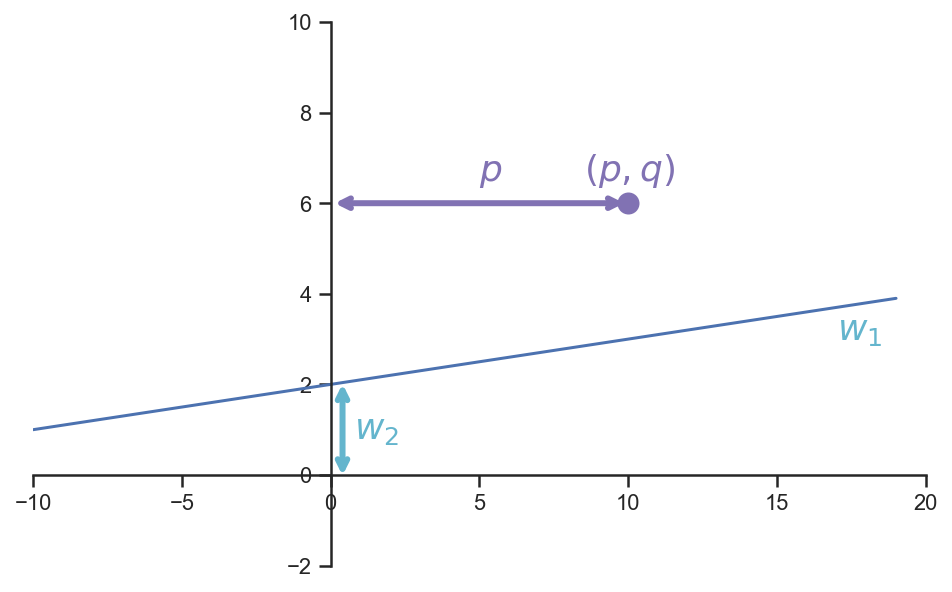

In [594]:
fig, ax = plt.subplots(figsize=(8,5))

w1 = 0.1  # slope
w2 = 2  # intercept

p = 10
q = 6

alpha = 0

x = np.array(np.arange(-10,20))  
y = (w1 + p * alpha) * x + (w2 + alpha)

plt.plot(x, y)

# Draw p,q dot with text
ax.plot(p,q,'o', color=color_purple, markersize='10')
ax.text(p-1.5,q+0.5,'$(p,q)$', fontsize=18, fontweight='bold', color=color_purple)

# Draw p arrow with text
plt.annotate('', xy=(p,q), xytext=(0,q), arrowprops=dict(arrowstyle='<->', color=color_purple, lw=3))
ax.text(p/2,q+0.5,'$p$', fontsize=18, fontweight='bold', color=color_purple)

# Draw w1 and text
ax.text(17,3,'$w_1$', fontsize=18, fontweight='bold', color=color_aqua)

# Draw w2 arrow and text
plt.annotate('', xy=(0.4,-0.1), xytext=(0.4,2.1), arrowprops=dict(arrowstyle='<->', color=color_aqua, lw=3))
ax.text(0.8,0.8,'$w_2$', fontsize=18, fontweight='bold', color=color_aqua)

# Set axes limits
ax.set_xlim(-10, 20)
ax.set_ylim(-2, 10)

# Set the x-spine
ax.spines['left'].set_position('zero')

# Turn off the right spine/ticks
ax.spines['right'].set_color('none')

# Set the y-spine
ax.spines['bottom'].set_position('zero')

# Turn off the top spine/ticks
ax.spines['top'].set_color('none');

Below sequence of plots shows how the line slowly moved in 4 steps towards a better fit (given we only have 1 point to fit against).

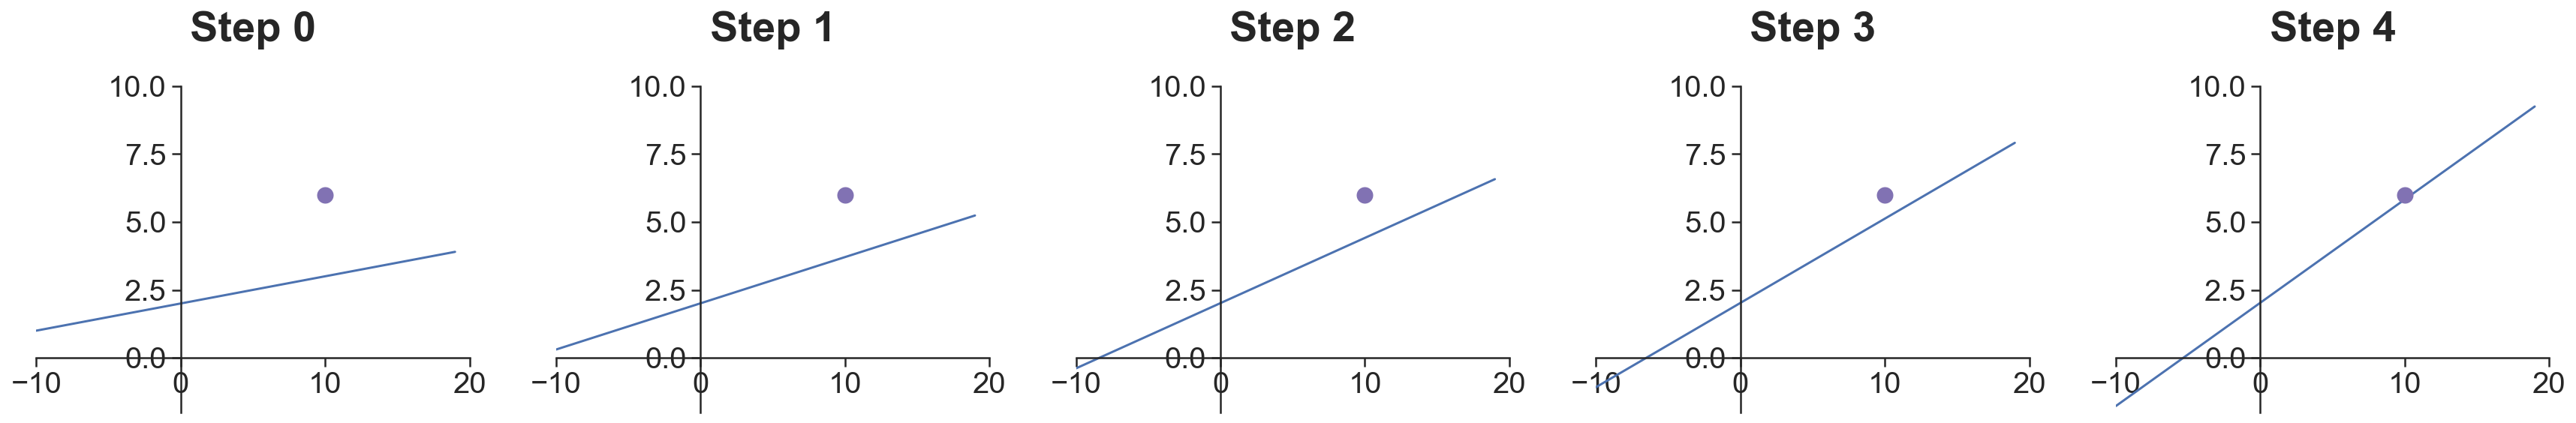

In [595]:
plt.figure(figsize = [30, 4])

alpha = 0.007
steps = 5

for step in range(0, steps):
    ax = plt.subplot(1, steps, step+1)
    alpha_step = alpha * step
    
    ax.set_title('Step {}'.format(step), fontweight='bold', fontsize=28, pad=30)
    ax.tick_params(axis='both', which='major', labelsize=20)
    
    y = (w1 + p * alpha_step) * x + (w2 + alpha_step)
    plt.plot(x, y)

    # Draw p,q dot with text
    ax.plot(p,q,'o', color=color_purple, markersize='10')

    # Set axes limits
    ax.set_xlim(-10, 20)
    ax.set_ylim(-2, 10)

    # Set the x-spine
    ax.spines['left'].set_position('zero')

    # Turn off the right spine/ticks
    ax.spines['right'].set_color('none')

    # Set the y-spine
    ax.spines['bottom'].set_position('zero')

    # Turn off the top spine/ticks
    ax.spines['top'].set_color('none');

#### Example 2: point below the line, with positive x-coordinate

If the point is located below the line we would adjust the formula to the below, which would make the slope $\color{#64b5cd}{w_1}$ as well as the intercept $\color{#64b5cd}{w_2}$ decrease.

$y = \color{#64b5cd}{(w_1 - \color{#8172b3}{p}\color{#dd8452}{\alpha})}x + \color{#64b5cd}{(w_2 - \color{#dd8452}{\alpha})}$

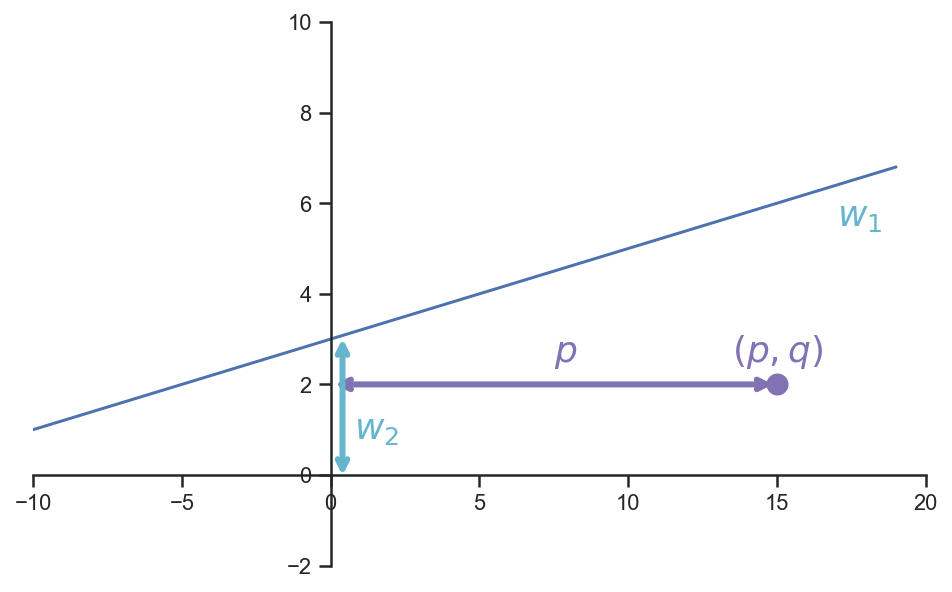

In [596]:
fig, ax = plt.subplots(figsize=(8,5))

w1 = 0.2  # slope
w2 = 3  # intercept

p = 15
q = 2

alpha = 0

x = np.array(np.arange(-10,20))  
y = (w1 - p * alpha) * x + (w2 - alpha)

plt.plot(x, y)

# Draw p,q dot with text
ax.plot(p,q,'o', color=color_purple, markersize='10')
ax.text(p - 1.5,q + 0.5,'$(p,q)$', fontsize=18, fontweight='bold', color=color_purple)

# Draw p arrow with text
plt.annotate('', xy=(p,q), xytext=(0,q), arrowprops=dict(arrowstyle='<->', color=color_purple, lw=3))
ax.text(p/2,q+0.5,'$p$', fontsize=18, fontweight='bold', color=color_purple)

# Draw w1 and text
ax.text(17,5.5,'$w_1$', fontsize=18, fontweight='bold', color=color_aqua)

# Draw w2 arrow and text
plt.annotate('', xy=(0.4,-0.1), xytext=(0.4,3.1), arrowprops=dict(arrowstyle='<->', color=color_aqua, lw=3))
ax.text(0.8,0.8,'$w_2$', fontsize=18, fontweight='bold', color=color_aqua)

# Set axes limits
ax.set_xlim(-10, 20)
ax.set_ylim(-2, 10)

# Set the x-spine
ax.spines['left'].set_position('zero')

# Turn off the right spine/ticks
ax.spines['right'].set_color('none')

# Set the y-spine
ax.spines['bottom'].set_position('zero')

# Turn off the top spine/ticks
ax.spines['top'].set_color('none');

Below sequence of plots shows how the line slowly moved in 4 steps towards a better fit (given we only have 1 point to fit against).

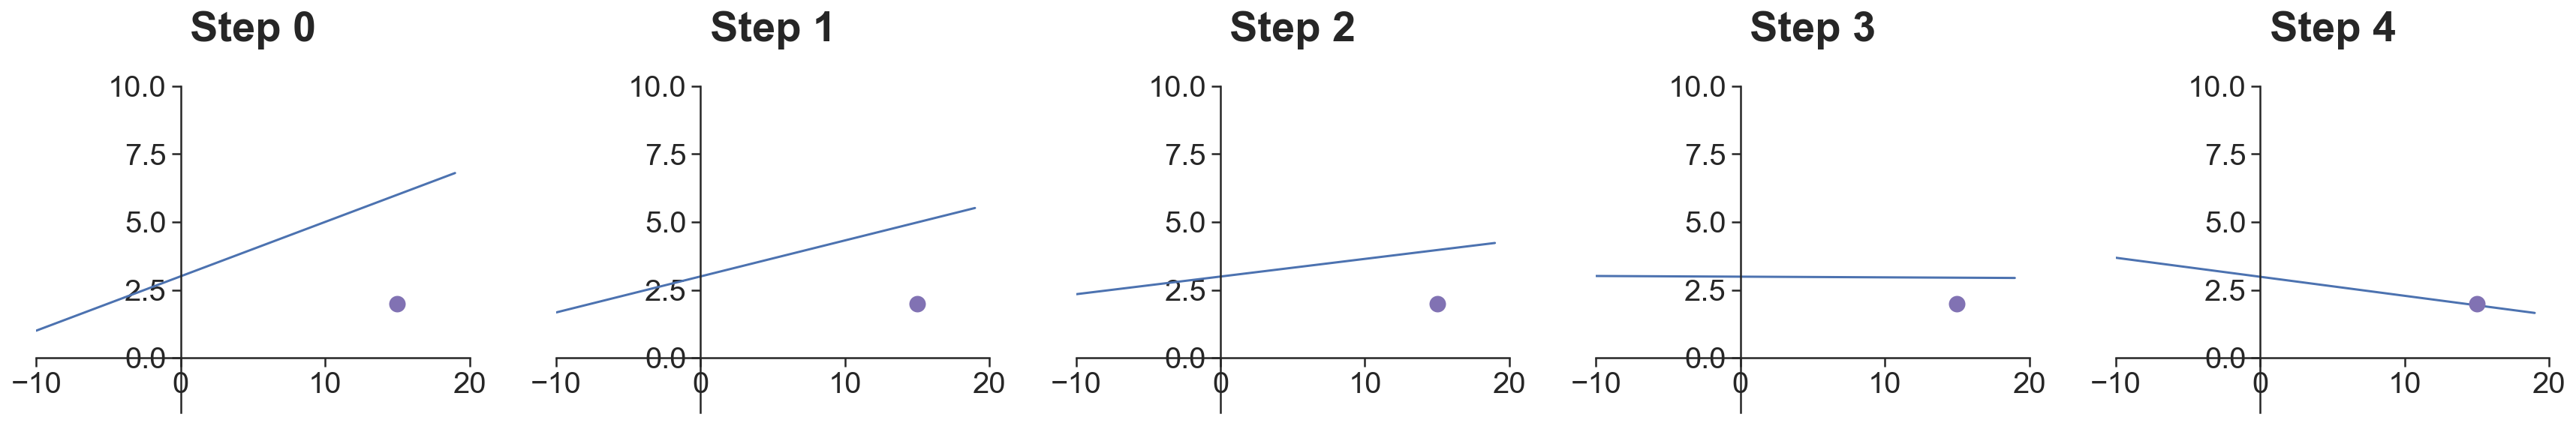

In [597]:
plt.figure(figsize = [30, 4])

alpha = 0.0045
steps = 5

for step in range(0, steps):
    ax = plt.subplot(1, steps, step+1)
    alpha_step = alpha * step
    
    ax.set_title('Step {}'.format(step), fontweight='bold', fontsize=28, pad=30)
    ax.tick_params(axis='both', which='major', labelsize=20)
    
    y = (w1 - p * alpha_step) * x + (w2 - alpha_step)
    plt.plot(x, y)

    # Draw p,q dot with text
    ax.plot(p,q,'o', color=color_purple, markersize='10')

    # Set axes limits
    ax.set_xlim(-10, 20)
    ax.set_ylim(-2, 10)

    # Set the x-spine
    ax.spines['left'].set_position('zero')

    # Turn off the right spine/ticks
    ax.spines['right'].set_color('none')

    # Set the y-spine
    ax.spines['bottom'].set_position('zero')

    # Turn off the top spine/ticks
    ax.spines['top'].set_color('none');

#### Example 3: point above the line, with negative x-coordinate

If the point is located above the line, but with negative x-coordinate, we use the original formula as the negative x coordinate of the point $\color{#8172b3}{p}$, would already make the slope $\color{#64b5cd}{w_1}$ as well as the intercept $\color{#64b5cd}{w_2}$ decrease.

$y = \color{#64b5cd}{(w_1 + \color{#8172b3}{p}\color{#dd8452}{\alpha})}x + \color{#64b5cd}{(w_2 + \color{#dd8452}{\alpha})}$

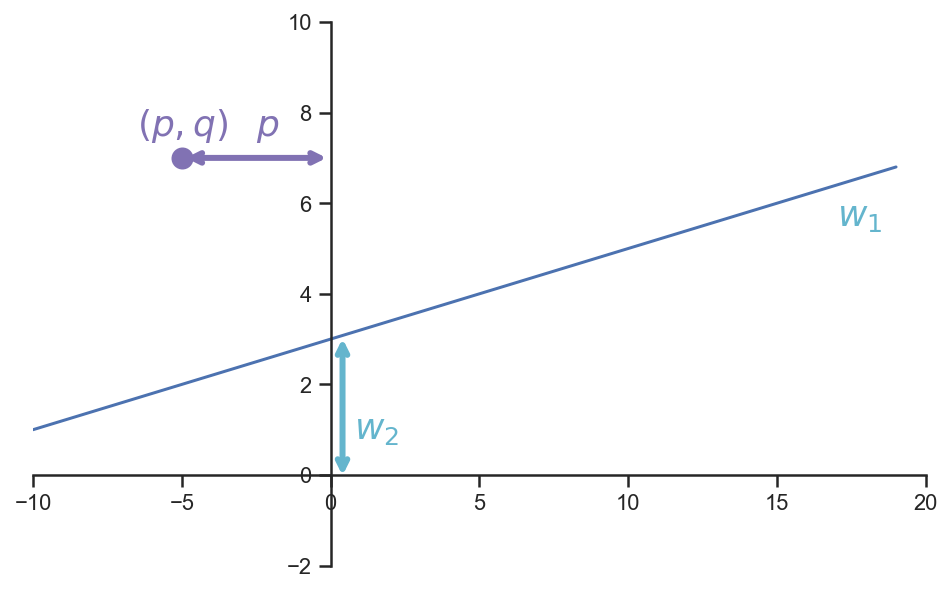

In [598]:
fig, ax = plt.subplots(figsize=(8,5))

w1 = 0.2  # slope
w2 = 3  # intercept

p = -5
q = 7

alpha = 0

x = np.array(np.arange(-10,20))  
y = (w1 + p * alpha) * x + (w2 + alpha)

plt.plot(x, y)

# Draw p,q dot with text
ax.plot(p,q,'o', color=color_purple, markersize='10')
ax.text(p - 1.5,q + 0.5,'$(p,q)$', fontsize=18, fontweight='bold', color=color_purple)

# Draw p arrow with text
plt.annotate('', xy=(p,q), xytext=(0,q), arrowprops=dict(arrowstyle='<->', color=color_purple, lw=3))
ax.text(p/2,q+0.5,'$p$', fontsize=18, fontweight='bold', color=color_purple)

# Draw w1 and text
ax.text(17,5.5,'$w_1$', fontsize=18, fontweight='bold', color=color_aqua)

# Draw w2 arrow and text
plt.annotate('', xy=(0.4,-0.1), xytext=(0.4,3.1), arrowprops=dict(arrowstyle='<->', color=color_aqua, lw=3))
ax.text(0.8,0.8,'$w_2$', fontsize=18, fontweight='bold', color=color_aqua)

# Set axes limits
ax.set_xlim(-10, 20)
ax.set_ylim(-2, 10)

# Set the x-spine
ax.spines['left'].set_position('zero')

# Turn off the right spine/ticks
ax.spines['right'].set_color('none')

# Set the y-spine
ax.spines['bottom'].set_position('zero')

# Turn off the top spine/ticks
ax.spines['top'].set_color('none');

Below sequence of plots shows how the line slowly moved in 4 steps towards a better fit (given we only have 1 point to fit against).

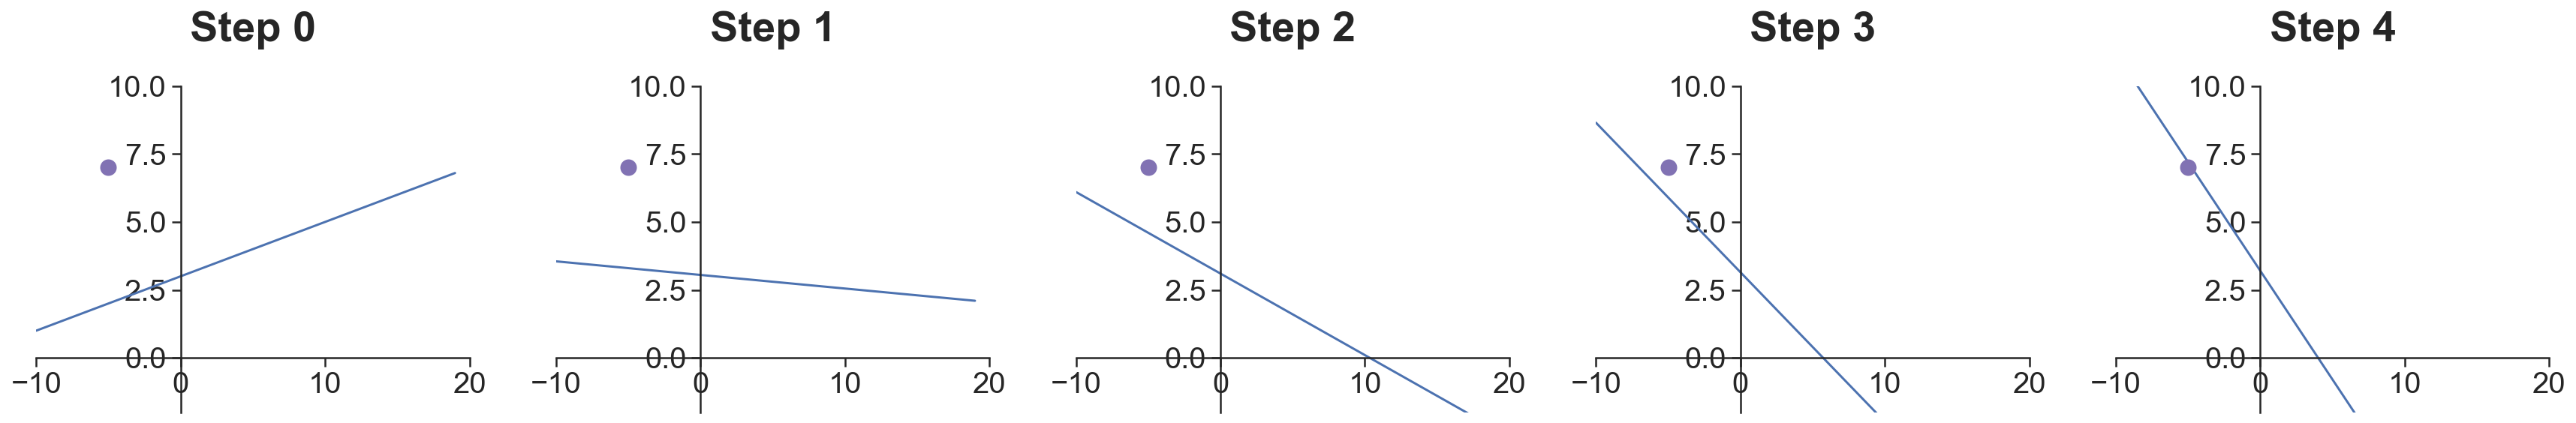

In [599]:
plt.figure(figsize = [30, 4])

alpha = 0.05
steps = 5

for step in range(0, steps):
    ax = plt.subplot(1, steps, step+1)
    alpha_step = alpha * step
    
    ax.set_title('Step {}'.format(step), fontweight='bold', fontsize=28, pad=30)
    ax.tick_params(axis='both', which='major', labelsize=20)
    
    y = (w1 + p * alpha_step) * x + (w2 + alpha_step)
    plt.plot(x, y)

    # Draw p,q dot with text
    ax.plot(p,q,'o', color=color_purple, markersize='10')

    # Set axes limits
    ax.set_xlim(-10, 20)
    ax.set_ylim(-2, 10)

    # Set the x-spine
    ax.spines['left'].set_position('zero')

    # Turn off the right spine/ticks
    ax.spines['right'].set_color('none')

    # Set the y-spine
    ax.spines['bottom'].set_position('zero')

    # Turn off the top spine/ticks
    ax.spines['top'].set_color('none');

### Square Trick

Another way (or 'trick') which is used in machine learning to move a line towards the points to fit is the "Square Trick". Here also, the slope and the intercept of a line are slowly adjusted, taking small steps towards a better fit of the line compared to the related points. The difference here is that the y distance between the point and the line is considered to evaluate the size of the step to be made towards a better fit for the line.

The formula below describes the plotted line, with a slope $\color{#64b5cd}{w_1}$ and an intecept $\color{#64b5cd}{w_2}$. In the below examples, the line needs to fit the point at $\color{#8172b3}{(p,q)}$, meaning it will need to move closer to it. Similar as with the absolute trick, steps would be taken towards a better fit as per the "learning rate" $\color{#dd8452}{\alpha}$, which would slowly adjust the slope towards the point as well as moving the full line upwards. The difference however here is that the y distance between point and line $\color{#c44e52}{(q-q')}$ influences the step size.

$y = \color{#64b5cd}{(w_1 + \color{#8172b3}{p}\color{#c44e52}{(q-q')}\color{#dd8452}{\alpha})}x + \color{#64b5cd}{(w_2 + \color{#c44e52}{(q-q')}\color{#dd8452}{\alpha})}$

#### Example: point above the line, with positive x-coordinate

The most straight forward example is one where we adjust a line to fit a single point which has a positive x-coordinate and where the point is located above the current line. Here we would choose a positive $\color{#dd8452}{\alpha}$ value, which would make the slope $\color{#64b5cd}{w_1}$ as well as the intercept $\color{#64b5cd}{w_2}$ increase. Now we will also consider the y distance between point and line $\color{#c44e52}{(q-q')}$ though.

$y = \color{#64b5cd}{(w_1 + \color{#8172b3}{p}\color{#c44e52}{(q-q')}\color{#dd8452}{\alpha})}x + \color{#64b5cd}{(w_2 + \color{#c44e52}{(q-q')}\color{#dd8452}{\alpha})}$

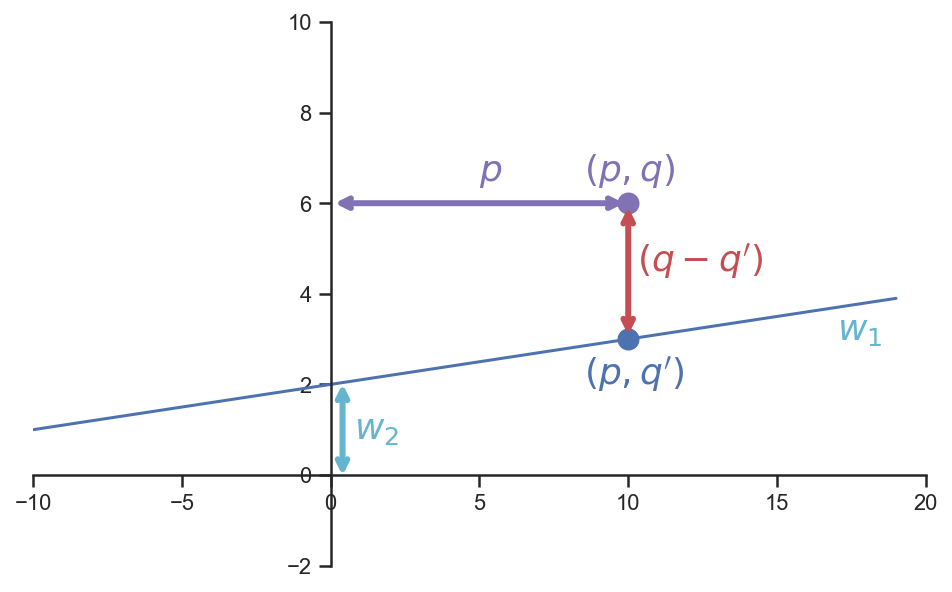

In [600]:
fig, ax = plt.subplots(figsize=(8,5))

w1 = 0.1  # slope
w2 = 2  # intercept

p = 10
q = 6
q_prime = (w1 + p * alpha) * p + (w2 + alpha)

alpha = 0

x = np.array(np.arange(-10,20))  
y = (w1 + p * (q - q_prime) * alpha) * x + (w2 + (q - q_prime) * alpha)

plt.plot(x, y)

# Draw p,q dot with text
ax.plot(p,q,'o', color=color_purple, markersize='10')
ax.text(p-1.5,q+0.5,'$(p,q)$', fontsize=18, fontweight='bold', color=color_purple)

# Draw p arrow with text
plt.annotate('', xy=(p,q), xytext=(0,q), arrowprops=dict(arrowstyle='<->', color=color_purple, lw=3))
ax.text(p/2,q+0.5,'$p$', fontsize=18, fontweight='bold', color=color_purple)

# Draw q-q' arrow with text
ax.plot(p,3,'o', color=color_blue, markersize='10')
plt.annotate('', xy=(p,q), xytext=(p, p*w1 + w2), arrowprops=dict(arrowstyle='<->', color=color_red, lw=3))
ax.text(10.3,4.5,'$(q - q\')$', fontsize=18, fontweight='bold', color=color_red)
ax.text(p-1.5,2,'$(p,q\')$', fontsize=18, fontweight='bold', color=color_blue)

# Draw w1 and text
ax.text(17,3,'$w_1$', fontsize=18, fontweight='bold', color=color_aqua)

# Draw w2 arrow and text
plt.annotate('', xy=(0.4,-0.1), xytext=(0.4,2.1), arrowprops=dict(arrowstyle='<->', color=color_aqua, lw=3))
ax.text(0.8,0.8,'$w_2$', fontsize=18, fontweight='bold', color=color_aqua)

# Set axes limits
ax.set_xlim(-10, 20)
ax.set_ylim(-2, 10)

# Set the x-spine
ax.spines['left'].set_position('zero')

# Turn off the right spine/ticks
ax.spines['right'].set_color('none')

# Set the y-spine
ax.spines['bottom'].set_position('zero')

# Turn off the top spine/ticks
ax.spines['top'].set_color('none');

Below sequence of plots shows how the movement of the line towards the point slows down as it approaches the point.

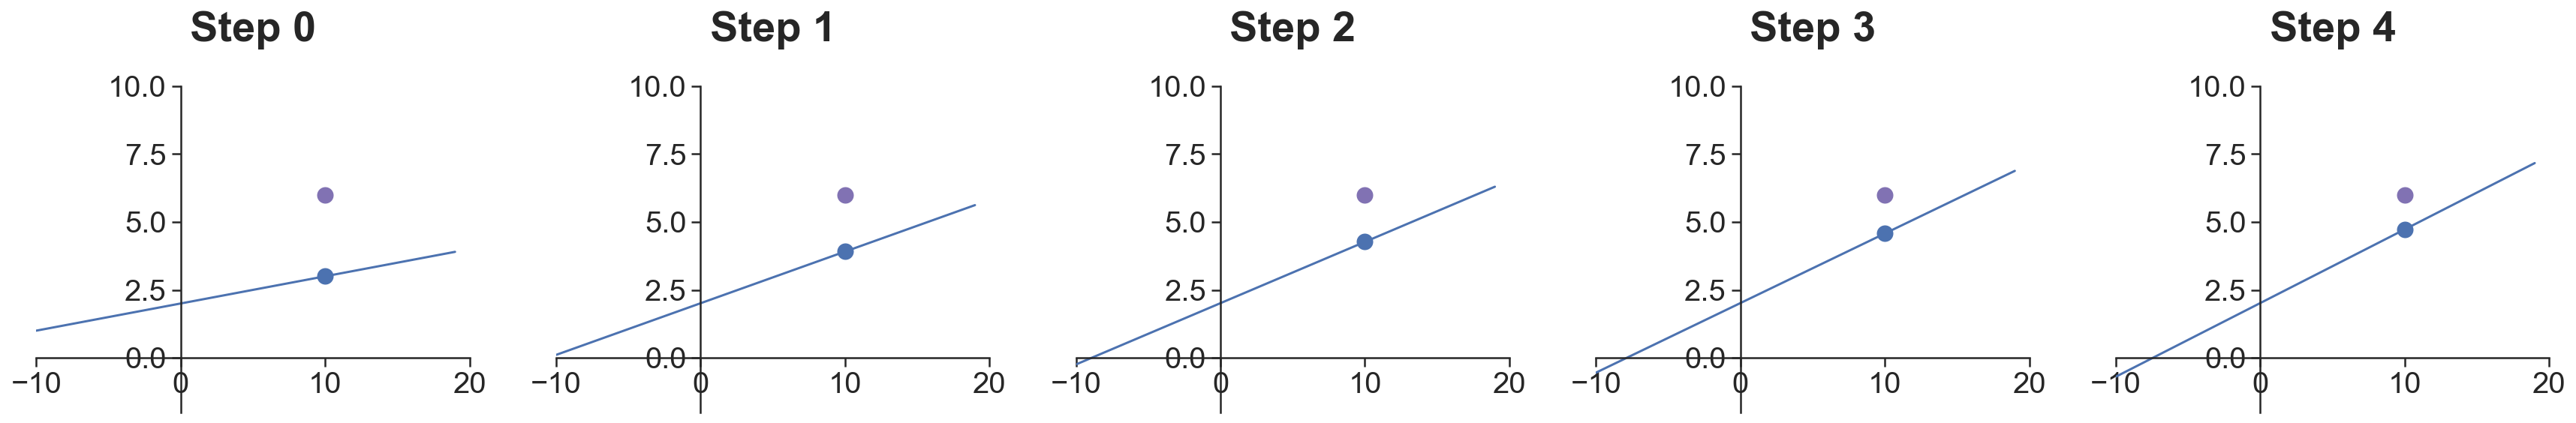

In [601]:
plt.figure(figsize = [30, 4])

alpha = 0.003
steps = 5

for step in range(0, steps):
    ax = plt.subplot(1, steps, step+1)
    alpha_step = alpha * step
    
    ax.set_title('Step {}'.format(step), fontweight='bold', fontsize=28, pad=30)
    ax.tick_params(axis='both', which='major', labelsize=20)
  
    y = (w1 + p * (q - q_prime) * alpha_step) * x + (w2 + (q - q_prime) * alpha_step)
    q_prime = (w1 + p * (q - q_prime) * alpha_step) * p + (w2 + (q - q_prime) * alpha_step)
    plt.plot(x, y)

    # Draw p,q dot with text
    ax.plot(p,q,'o', color=color_purple, markersize='10')
    ax.plot(p,q_prime,'o', color=color_blue, markersize='10')

    # Set axes limits
    ax.set_xlim(-10, 20)
    ax.set_ylim(-2, 10)

    # Set the x-spine
    ax.spines['left'].set_position('zero')

    # Turn off the right spine/ticks
    ax.spines['right'].set_color('none')

    # Set the y-spine
    ax.spines['bottom'].set_position('zero')

    # Turn off the top spine/ticks
    ax.spines['top'].set_color('none');

```{note}
When using the Square Trick we do not require to adjust the formula for points beneath the line as $\color{#c44e52}{(q-q')}$ would naturally become negative in this case resulting in the require change of direction in updates to the slope and intercept of the line.
```